In [4]:
max_pixels=1003520
height , width =3024,1964
size = height*width
ratio = max_pixels/size
print(ratio,width,height)



0.16896733801010785 1964 3024


In [6]:
new_width = width * ratio
new_height = height * ratio
print(new_height,new_width)
# 4. Adjust for the divisibility factor
final_width = int(round(new_width / 28) * 28)
final_height = int(round(new_height / 28) * 28)
print(final_height,final_width)

510.9572301425662 331.85185185185185
504 336


In [19]:
import os
import glob
import re
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# ── Paths ──────────────────────────────────────────────────────────────────────
base_dir       = Path("screenshots/booking-dataset")  # project-relative
original_dir   = base_dir
annotated_dir  = base_dir / "annotated"

# ── Helpers ────────────────────────────────────────────────────────────────────
def extract_step_number(filename: str) -> int | None:
    """Return the integer step number found in a filename like 'step3.png'."""
    m = re.search(r"[Ss]tep(\d+)", filename)
    return int(m.group(1)) if m else None

# ── Locate images ──────────────────────────────────────────────────────────────
original_files  = [p for p in original_dir.glob("*.png") if extract_step_number(p.name) is not None]
annotated_files = [p for p in annotated_dir.glob("*.png")]

# Map: step → {"original": Path, "annotated": Path}
step_mapping: dict[int, dict[str, Path | None]] = {}
for p in original_files:
    step_mapping.setdefault(extract_step_number(p.name), {})["original"] = p
for p in annotated_files:
    step = extract_step_number(p.name)
    if step in step_mapping:
        step_mapping[step]["annotated"] = p

# Keep only steps that have both images
complete_steps = {k: v for k, v in step_mapping.items() if v.get("original") and v.get("annotated")}

print(f"Found {len(complete_steps)} complete step pairs:")
for step in sorted(complete_steps):
    print(f"  Step {step}: {complete_steps[step]['original'].name}  ➜  {complete_steps[step]['annotated'].name}")


Found 20 complete step pairs:
  Step 0: Screenshot 2025-06-12 at 14.19.11-Step0.png  ➜  annotated_booking-dataset_step0.png
  Step 1: Screenshot 2025-06-12 at 14.20.12-step1.png  ➜  annotated_booking-dataset_step1.png
  Step 2: Screenshot 2025-06-12 at 14.22.20-step2.png  ➜  annotated_booking-dataset_step2.png
  Step 3: Screenshot 2025-06-12 at 14.30.39-step3.png  ➜  annotated_booking-dataset_step3.png
  Step 4: Screenshot 2025-06-12 at 14.23.55-step4.png  ➜  annotated_booking-dataset_step4.png
  Step 5: Screenshot 2025-06-12 at 14.24.08-step5.png  ➜  annotated_booking-dataset_step5.png
  Step 6: Screenshot 2025-06-12 at 14.24.27-step6.png  ➜  annotated_booking-dataset_step6.png
  Step 7: Screenshot 2025-06-12 at 14.24.36-step7.png  ➜  annotated_booking-dataset_step7.png
  Step 8: Screenshot 2025-06-12 at 14.24.46-step8.png  ➜  annotated_booking-dataset_step8.png
  Step 9: Screenshot 2025-06-12 at 14.24.50-step9.png  ➜  annotated_booking-dataset_step9.png
  Step 10: Screenshot 2025-06-

In [21]:
def collect_dataset_data_simple(complete_steps: dict[int, dict[str, Path]]):
    """
    For every screenshot pair:
      • display the original image
      • ask once for an INSTRUCTION
      • store platform (= 'Mac Desktop') and resolution (image.size)
    Produces screenshots/booking-dataset/booking_dataset.csv
    """
    rows = []
    steps = sorted(complete_steps)

    print("─" * 70)
    print("  • Type ‘skip’ to skip a step.")
    print("  • Type ‘quit’ to stop and save what you have.")
    print("─" * 70)

    for idx, step in enumerate(steps, 1):
        info = complete_steps[step]
        print(f"\nStep {step}  ({idx}/{len(steps)})")
        print(f"Original : {info['original'].name}")
        print(f"Annotated: {info['annotated'].name}")

        # open & show original
        img = Image.open(info["original"])
        plt.figure(figsize=(10, 7))
        plt.imshow(img)
        plt.title(f"Step {step}")
        plt.axis("off")
        plt.show()

        # ask for instruction
        instr = input(" INSTRUCTION > ").strip()
        if instr.lower() == "quit":
            break
        if instr.lower() == "skip":
            continue

        # build row
        row = {
            "original_image_path":  str(info["original"].relative_to(base_dir)),
            "annotated_image_path": str(info["annotated"].relative_to(base_dir)),
            "instruction":          instr,
            "platform":             "Mac Desktop",
            "resolution":           img.size,         # (width, height)
        }
        rows.append(row)

        # preview saved row
        print("✓ Saved row:")
        print(f"  original   : {row['original_image_path']}")
        print(f"  annotated  : {row['annotated_image_path']}")
        print(f"  resolution : {row['resolution']}")
        print(f"  platform   : {row['platform']}")
        print(f"  instruction: {row['instruction'][:80]}{'...' if len(row['instruction'])>80 else ''}")

    # ── Write CSV ──────────────────────────────────────────────────────────────
    if rows:
        df = pd.DataFrame(rows)
        csv_path = base_dir / "booking_dataset.csv"
        df.to_csv(csv_path, index=False)
        print(f"\nStored {len(df)} rows → {csv_path}")
        return df
    else:
        print("No data collected.")
        return None

print("\nReady!  Run the next cell to begin:")



Ready!  Run the next cell to begin:


──────────────────────────────────────────────────────────────────────
  • Type ‘skip’ to skip a step.
  • Type ‘quit’ to stop and save what you have.
──────────────────────────────────────────────────────────────────────

Step 0  (1/20)
Original : Screenshot 2025-06-12 at 14.19.11-Step0.png
Annotated: annotated_booking-dataset_step0.png


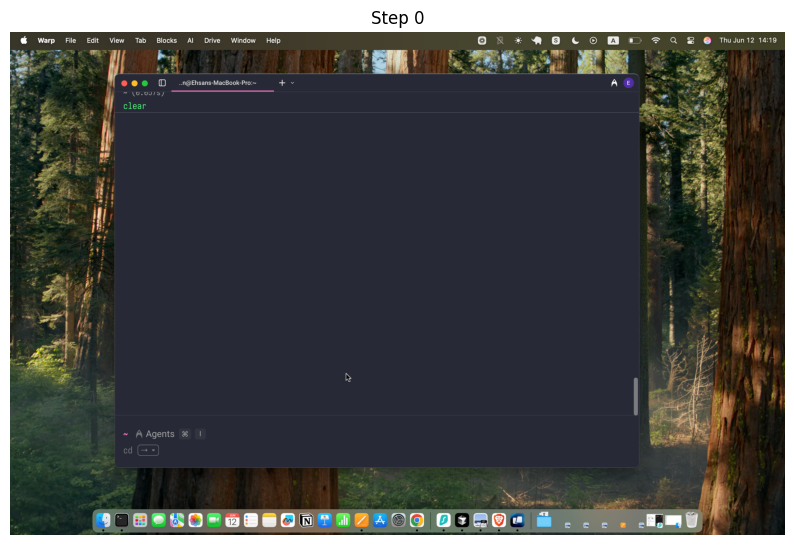

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.19.11-Step0.png
  annotated  : annotated/annotated_booking-dataset_step0.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: open Google Chrome icon in the dock.

Step 1  (2/20)
Original : Screenshot 2025-06-12 at 14.20.12-step1.png
Annotated: annotated_booking-dataset_step1.png


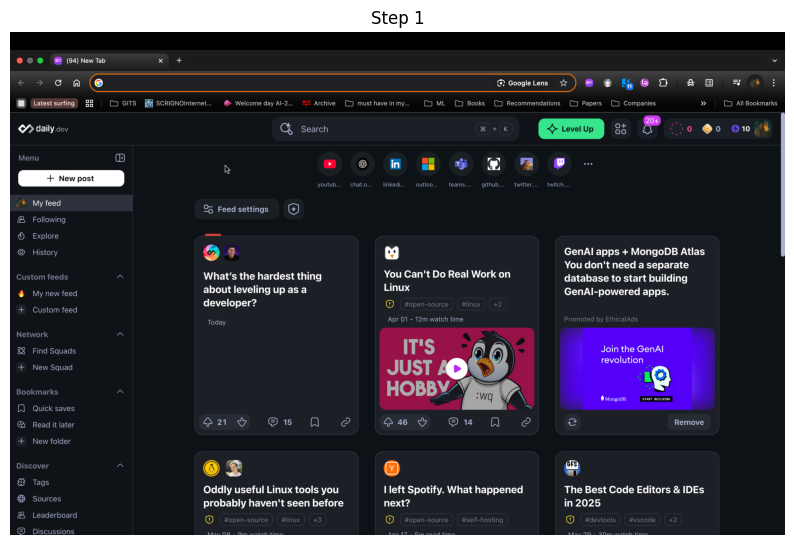

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.20.12-step1.png
  annotated  : annotated/annotated_booking-dataset_step1.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click on the URL bar at the top of the page.

Step 2  (3/20)
Original : Screenshot 2025-06-12 at 14.22.20-step2.png
Annotated: annotated_booking-dataset_step2.png


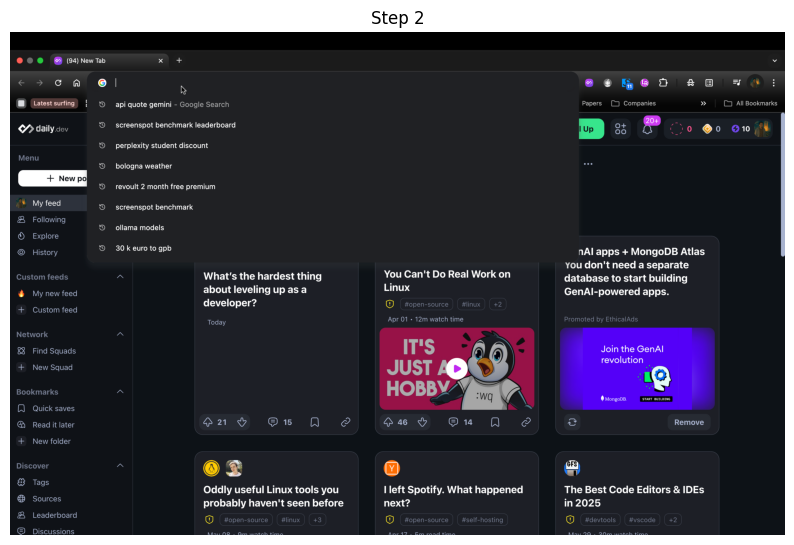

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.22.20-step2.png
  annotated  : annotated/annotated_booking-dataset_step2.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: go to the booking.com website url.

Step 3  (4/20)
Original : Screenshot 2025-06-12 at 14.30.39-step3.png
Annotated: annotated_booking-dataset_step3.png


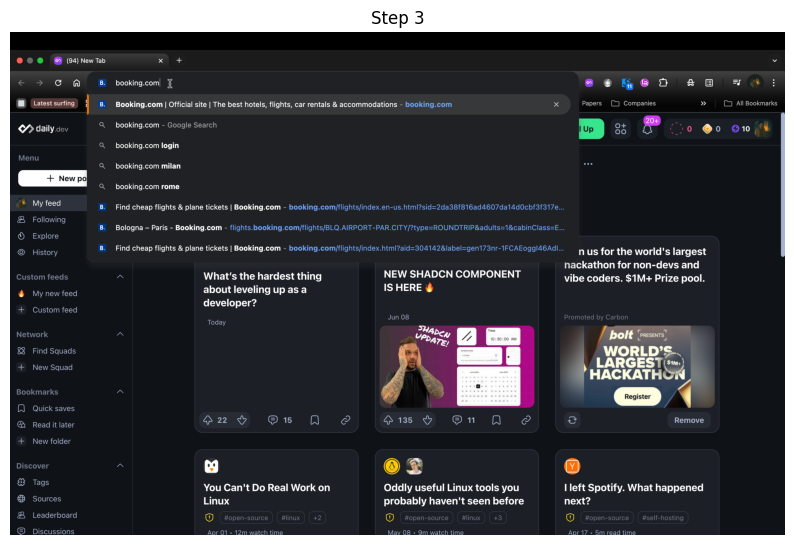

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.30.39-step3.png
  annotated  : annotated/annotated_booking-dataset_step3.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: press key to go to the booking.com website.

Step 4  (5/20)
Original : Screenshot 2025-06-12 at 14.23.55-step4.png
Annotated: annotated_booking-dataset_step4.png


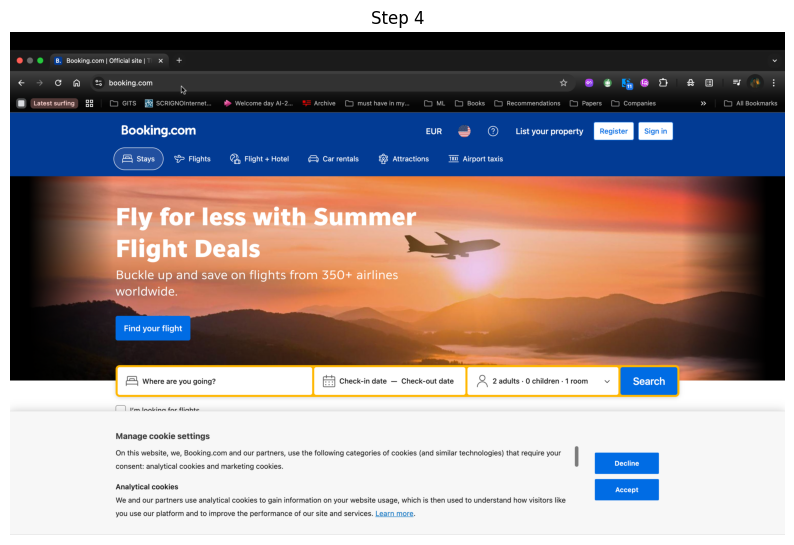

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.23.55-step4.png
  annotated  : annotated/annotated_booking-dataset_step4.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click on the flight section.

Step 5  (6/20)
Original : Screenshot 2025-06-12 at 14.24.08-step5.png
Annotated: annotated_booking-dataset_step5.png


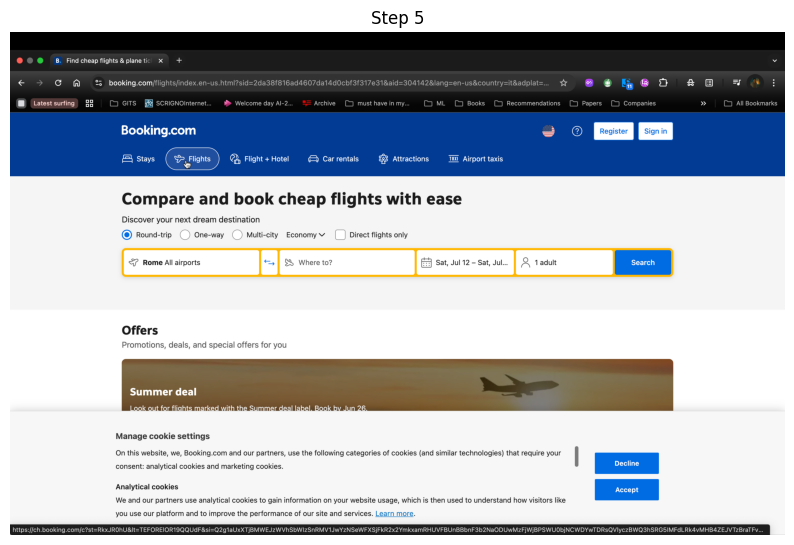

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.24.08-step5.png
  annotated  : annotated/annotated_booking-dataset_step5.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click the button with the plane icon and the text 'Rome All airports'.

Step 6  (7/20)
Original : Screenshot 2025-06-12 at 14.24.27-step6.png
Annotated: annotated_booking-dataset_step6.png


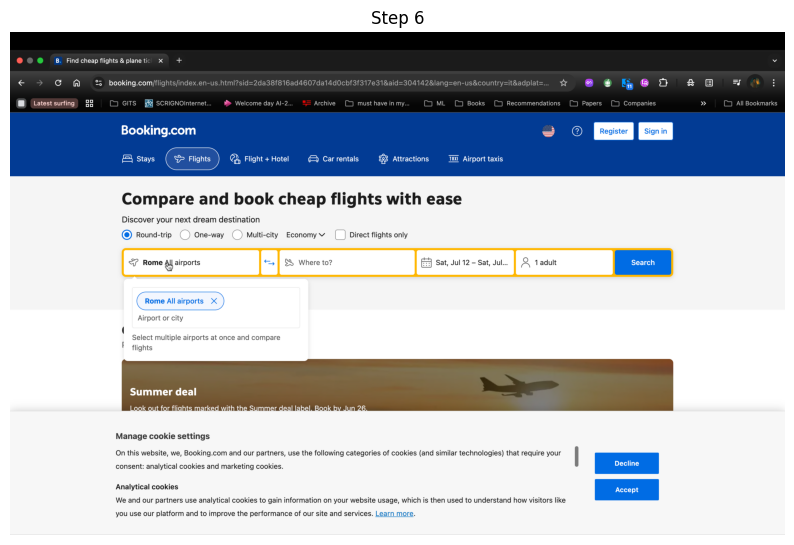

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.24.27-step6.png
  annotated  : annotated/annotated_booking-dataset_step6.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click the close icon on the 'Rome All airports' tag.

Step 7  (8/20)
Original : Screenshot 2025-06-12 at 14.24.36-step7.png
Annotated: annotated_booking-dataset_step7.png


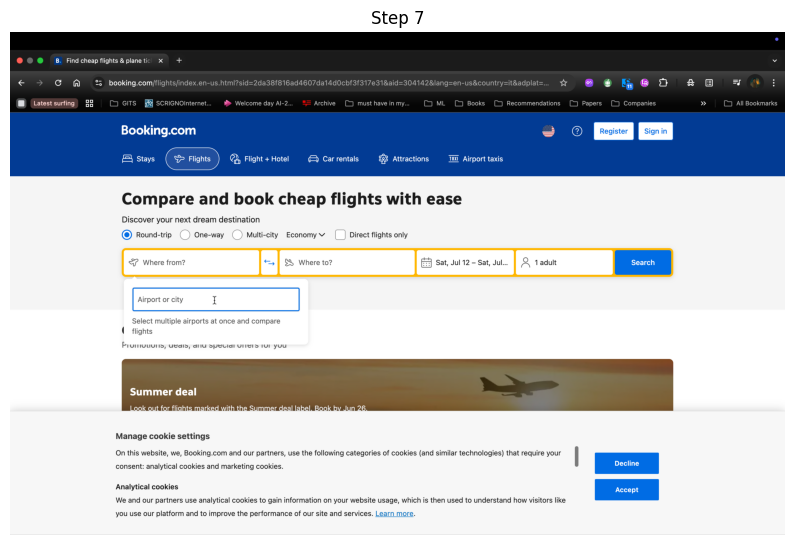

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.24.36-step7.png
  annotated  : annotated/annotated_booking-dataset_step7.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Type the Bologna as the departure location.

Step 8  (9/20)
Original : Screenshot 2025-06-12 at 14.24.46-step8.png
Annotated: annotated_booking-dataset_step8.png


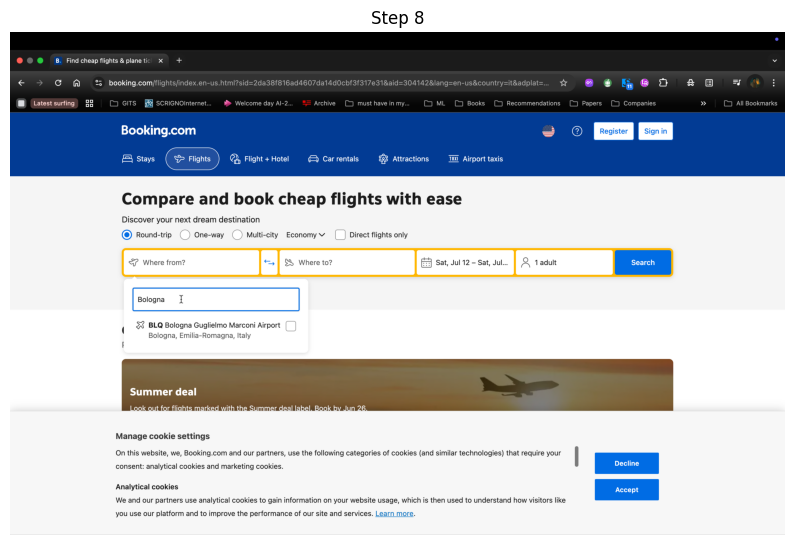

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.24.46-step8.png
  annotated  : annotated/annotated_booking-dataset_step8.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click the checkbox next to the 'BLQ Bologna Guglielmo Marconi Airport' suggestio...

Step 9  (10/20)
Original : Screenshot 2025-06-12 at 14.24.50-step9.png
Annotated: annotated_booking-dataset_step9.png


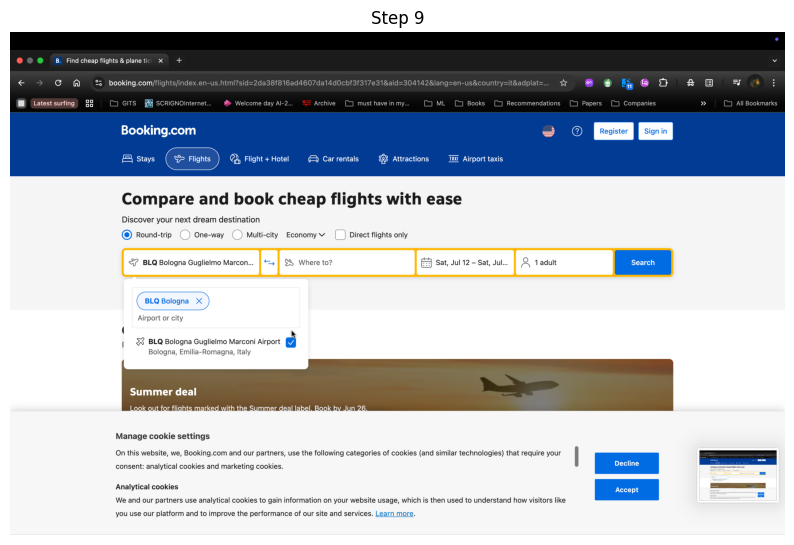

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.24.50-step9.png
  annotated  : annotated/annotated_booking-dataset_step9.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click on the destination input field labeled 'Where to?'

Step 10  (11/20)
Original : Screenshot 2025-06-12 at 14.25.04-step10.png
Annotated: annotated_booking-dataset_step10.png


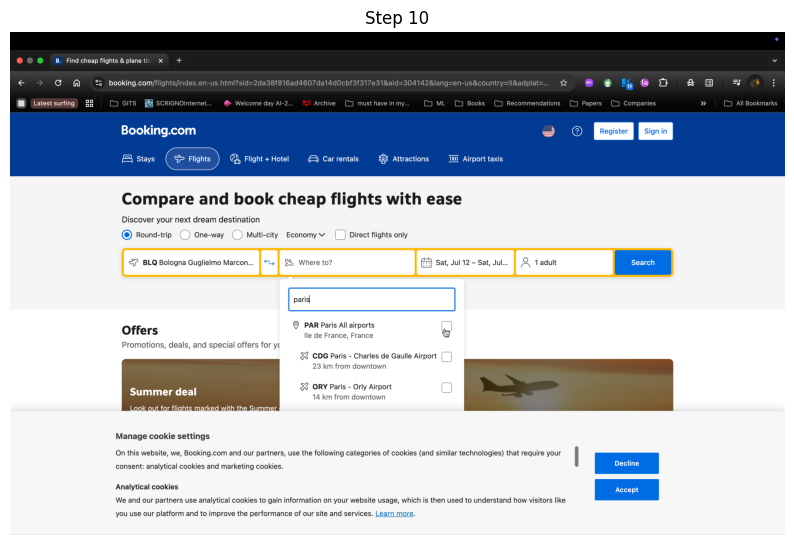

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.25.04-step10.png
  annotated  : annotated/annotated_booking-dataset_step10.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Select 'Paris All airports' to set it as the destination.

Step 11  (12/20)
Original : Screenshot 2025-06-12 at 14.25.09-step11.png
Annotated: annotated_booking-dataset_step11.png


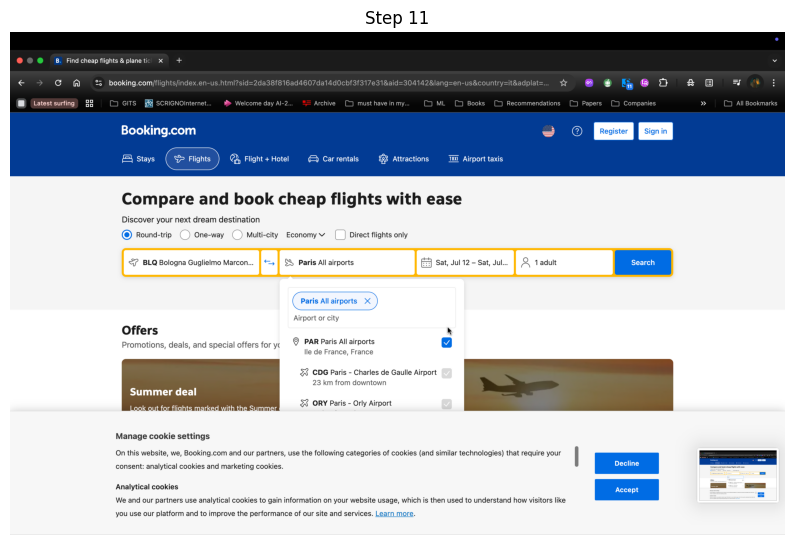

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.25.09-step11.png
  annotated  : annotated/annotated_booking-dataset_step11.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click on the date selection field.

Step 12  (13/20)
Original : Screenshot 2025-06-12 at 14.25.26-step12.png
Annotated: annotated_booking-dataset_step12.png


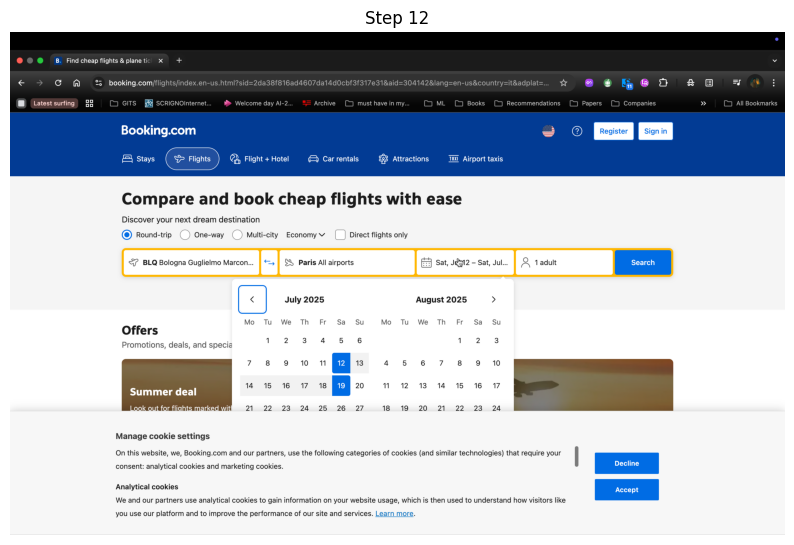

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.25.26-step12.png
  annotated  : annotated/annotated_booking-dataset_step12.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Adjust the view downwards to see the full calendar.

Step 13  (14/20)
Original : Screenshot 2025-06-12 at 14.25.32-step13.png
Annotated: annotated_booking-dataset_step13.png


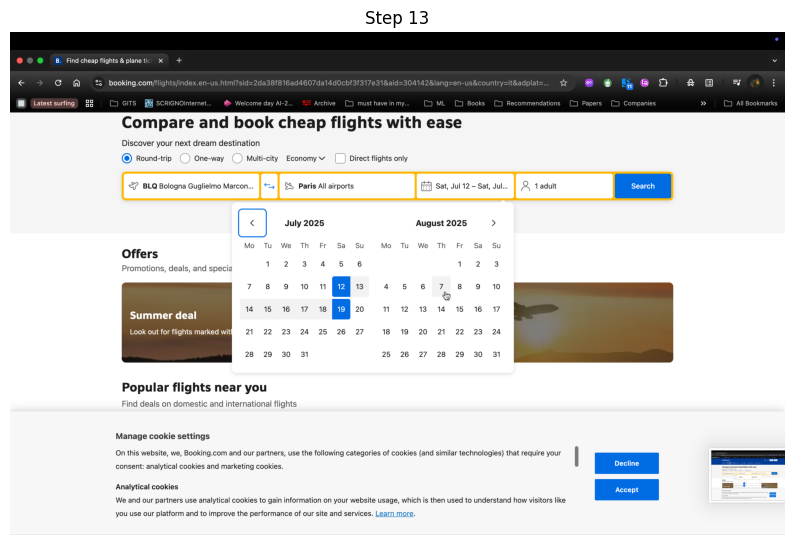

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.25.32-step13.png
  annotated  : annotated/annotated_booking-dataset_step13.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: In the August 2025 calendar, click on the number 4 to set it as the departure da...

Step 14  (15/20)
Original : Screenshot 2025-06-12 at 14.25.48-step14.png
Annotated: annotated_booking-dataset_step14.png


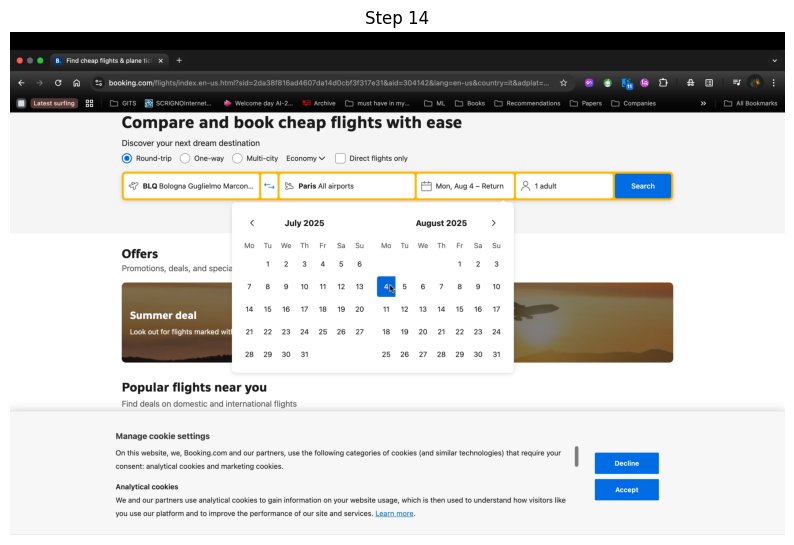

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.25.48-step14.png
  annotated  : annotated/annotated_booking-dataset_step14.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Select August 8th as the end date for the trip.

Step 15  (16/20)
Original : Screenshot 2025-06-12 at 14.28.14-step15.png
Annotated: annotated_booking-dataset_step15.png


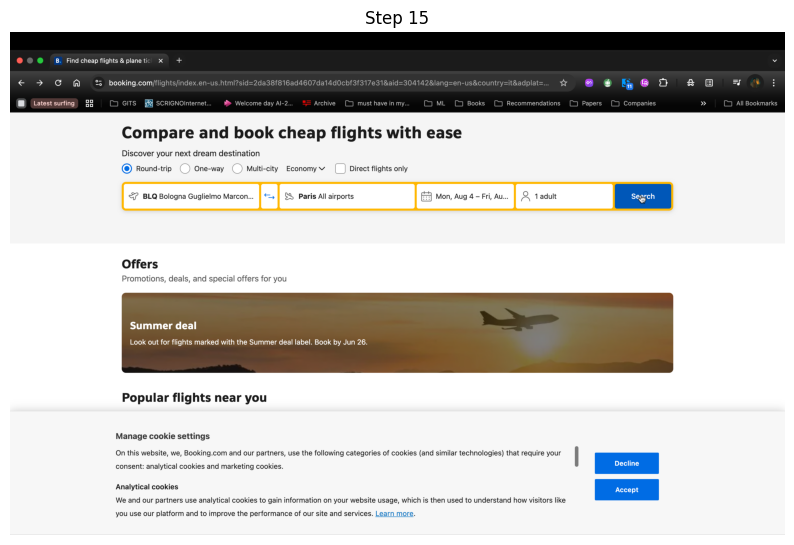

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.28.14-step15.png
  annotated  : annotated/annotated_booking-dataset_step15.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Start the search process.

Step 16  (17/20)
Original : Screenshot 2025-06-12 at 14.28.21-step16.png
Annotated: annotated_booking-dataset_step16.png


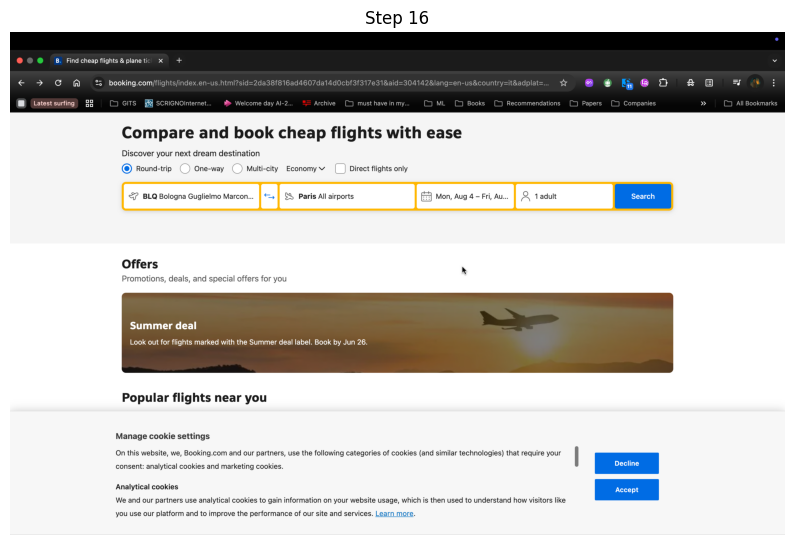

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.28.21-step16.png
  annotated  : annotated/annotated_booking-dataset_step16.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click on the search button.

Step 17  (18/20)
Original : Screenshot 2025-06-12 at 14.28.34-step17.png
Annotated: annotated_booking-dataset_step17.png


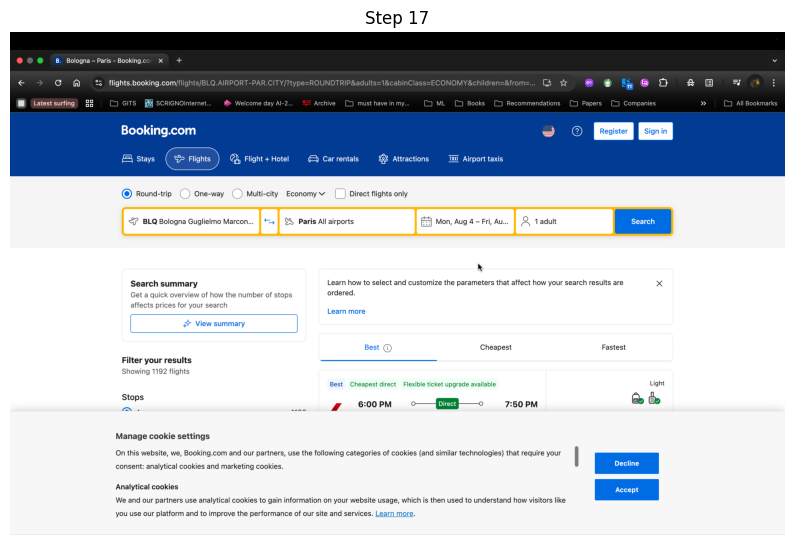

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.28.34-step17.png
  annotated  : annotated/annotated_booking-dataset_step17.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Click on the cheap flights option and scroll down a bit.

Step 18  (19/20)
Original : Screenshot 2025-06-12 at 14.29.04-step18.png
Annotated: annotated_booking-dataset_step18.png


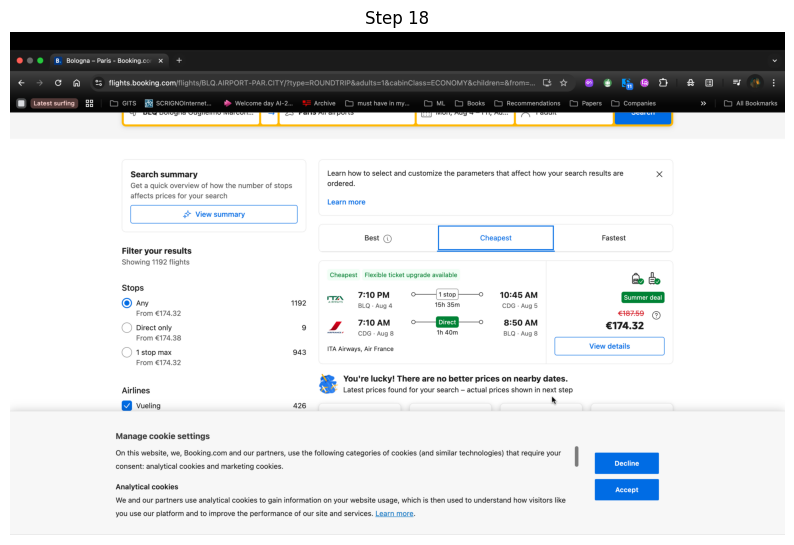

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.29.04-step18.png
  annotated  : annotated/annotated_booking-dataset_step18.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: View details of the first flight information.

Step 19  (20/20)
Original : Screenshot 2025-06-12 at 14.29.28-step19.png
Annotated: annotated_booking-dataset_step19.png


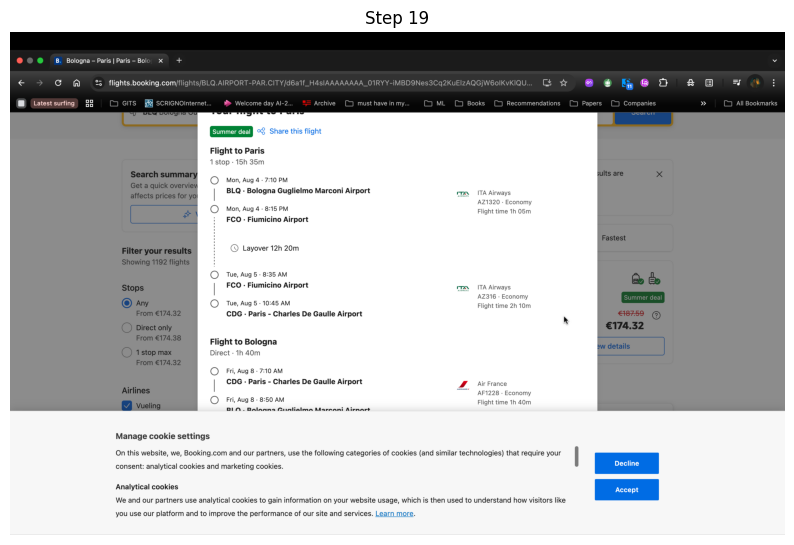

✓ Saved row:
  original   : Screenshot 2025-06-12 at 14.29.28-step19.png
  annotated  : annotated/annotated_booking-dataset_step19.png
  resolution : (3024, 1964)
  platform   : Mac Desktop
  instruction: Success! The cheapest flight is now visible.

Stored 20 rows → screenshots/booking-dataset/booking_dataset.csv


In [22]:
# Execute to launch the prompt loop
dataset_df = collect_dataset_data_simple(complete_steps)
